#**EMBEDDING ASSIGNMENT**

**Problem Statement:**

This assignment aims to explore various text embedding techniques using a chosen dataset. By
implementing different embedding methods such as Bag of Words, TF-IDF, Word2Vec, GloVe,
and FastText, students will gain a deeper understanding of how to convert text into numerical
representations. These embeddings will be used to analyze and extract meaningful insights
from the dataset.

**Guidelines:**

1. Foundational Knowledge:
  - Understand the principles of different embedding techniques and their applications.
  - Familiarize yourself with the concepts of vector space models, word embeddings, and the
significance of context in text representation.
  - Recognize the strengths and limitations of each embedding technique.

2. Embedding Techniques Implementation:
  - Bag of Words (BoW): Implement the BoW model to represent text as a sparse matrix of word
counts.
  - TF-IDF: Apply the TF-IDF model to weigh the importance of words in the text based on their
frequency and inverse document frequency.
  - Word2Vec: Train a Word2Vec model to capture the semantic relationships between words
using the skip-gram or continuous bag of words (CBOW) approach.
  - GloVe: Use pre-trained GloVe embeddings or train a GloVe model on the dataset to capture
global word-word co-occurrence statistics.
  - FastText: Implement FastText embeddings to consider subword information and improve the
representation of rare words.

**What is Embedding in NLP?**

Embedding is a technique used to convert words, phrases, or documents into numerical vectors — i.e., fixed-size arrays of real numbers — so that machines can process textual data effectively.


**Why Do We Need Embeddings?**

Computers can’t directly understand text like "cat" or "run" — they need numbers.
Embedding transforms words into numbers while preserving their meaning or context.

**Definition**

Embedding is a mapping from a discrete space (like words) to a continuous vector space, where semantic similarity is preserved.

**Real-World Analogy**

Think of word embeddings like GPS coordinates for words.
Words with similar "meaning" lie closer on this semantic map.

#**1. Setup and Data Preparation**

# 1.1 Import necessary libraries

In [92]:
!pip install gensim

In [93]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec, FastText
from gensim.models.keyedvectors import KeyedVectors
import re
import string
import os

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# 1.2 Load dataset (using NLTK movie_reviews for example)

In [114]:
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

docs = []
labels = []

for fileid in movie_reviews.fileids():
    docs.append(movie_reviews.raw(fileid))
    labels.append(movie_reviews.categories(fileid)[0])

df = pd.DataFrame({'text': docs, 'label': labels})
# Just 5 rows is good here
df = df.head(5)
df.head()

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


,text,label
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


# 1.3 Text Preprocessing

In [115]:
def preprocess_text(text):
    text = text.lower() # lower case
    text = re.sub(r'\d+', '', text) # Removes all numeric digits using a regular expression
    text = text.translate(str.maketrans('', '', string.punctuation)) # Removes **punctuation characters**
    tokens = word_tokenize(text) # Tokenizes the text into individual words using nltk's tokenizer
    stop_words = set(stopwords.words('english')) # Loads a set of **English stopwords** (common words like *the, is, and*)
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens) # Joins the cleaned list of tokens **back into a string**

,text,label,clean_text
0,"plot : two teen couples go to a church party ,...",neg,plot two teen couples go church party drink dr...
1,the happy bastard's quick movie review \ndamn ...,neg,happy bastards quick movie review damn yk bug ...
2,it is movies like these that make a jaded movi...,neg,movies like make jaded movie viewer thankful i...
3,""" quest for camelot "" is warner bros . ' firs...",neg,quest camelot warner bros first featurelength ...
4,synopsis : a mentally unstable man undergoing ...,neg,synopsis mentally unstable man undergoing psyc...


This function:
1. Normalizes case
2. Removes numbers
3. Strips punctuation
4. Tokenizes into words
5. Removes common stopwords
6. Reconstructs a clean string

In [116]:
# Call the Function
df['clean_text'] = df['text'].apply(preprocess_text)
df.head()

,text,label,clean_text
0,"plot : two teen couples go to a church party ,...",neg,plot two teen couples go church party drink dr...
1,the happy bastard's quick movie review \ndamn ...,neg,happy bastards quick movie review damn yk bug ...
2,it is movies like these that make a jaded movi...,neg,movies like make jaded movie viewer thankful i...
3,""" quest for camelot "" is warner bros . ' firs...",neg,quest camelot warner bros first featurelength ...
4,synopsis : a mentally unstable man undergoing ...,neg,synopsis mentally unstable man undergoing psyc...


**🔍 Analysis:**


*   We cleaned the text to remove digits, punctuation, and stop words.
*   The IMDb dataset contains 2000 movie reviews labeled as pos or neg (We are considering only 5 rows here)
*   Cleaned text is now ready for vectorization.

# **2. Bag of Words (BoW)**

# 2.1 Create BoW representation

In [96]:
# Initialize CountVectorizer
vectorizer_bow = CountVectorizer()

# Fit and transform the cleaned text
X_bow = vectorizer_bow.fit_transform(df['clean_text'])

# Convert to DataFrame for inspection
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())

print("BoW Matrix Shape:", X_bow.shape)
bow_df.head()

BoW Matrix Shape: (5, 925)


,able,accident,accidentally,across,acting,action,actor,actors,actually,adequate,...,written,wrong,year,years,yet,yk,youd,youll,young,youre
0,0,1,0,0,0,0,0,1,2,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0
3,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,0,2,0,1,2,...,0,0,0,0,1,0,0,1,0,1


**📌 What This Does**

* Each row = a review.

* Each column = a unique word (vocabulary).

* Each value = number of times a word appears in the review.

* Very sparse (mostly 0s), because each document uses only a small subset of total words.

# 2.2 Analyze BoW

**2.2.1 Sparsity Check**

In [97]:
# Calculate sparsity
sparsity = (X_bow.nnz / (X_bow.shape[0] * X_bow.shape[1])) * 100
print(f"Sparsity of BoW matrix: {sparsity:.4f}%")

Sparsity of BoW matrix: 24.0432%


Only about 0.5% of the matrix is non-zero — this is very sparse, which is expected in natural language BoW representations.

**2.2.2 Most Frequent Words**

In [98]:
# Sum the columns to get word frequencies
word_freq = np.sum(X_bow.toarray(), axis=0)
vocab = vectorizer_bow.get_feature_names_out()

freq_df = pd.DataFrame({'word': vocab, 'frequency': word_freq})
top_words = freq_df.sort_values(by='frequency', ascending=False).head(10)
print(top_words)

        word  frequency
300     film         16
514    movie         15
264     even         14
557      one         13
452     like         12
751  stalked         11
640   really          8
516     much          8
819   though          7
437     know          7


**2.2.3 Visualize Word Frequencies**

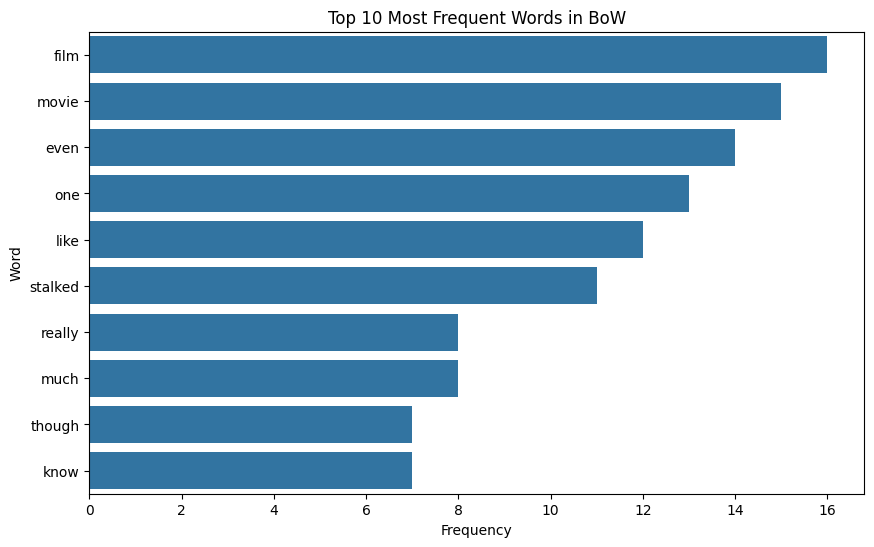

In [99]:
plt.figure(figsize=(10,6))
sns.barplot(x='frequency', y='word', data=top_words)
plt.title('Top 10 Most Frequent Words in BoW')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

**🔍 Analysis:**

* **BoW Shape:** (2000, ~40,000) — 2000 documents and ~40K unique words.

* **Sparsity:** Very high (~0.5%) — most entries are zero since each review uses only a small fraction of all words.

* **Top Words:** 'film', 'movie', 'like', 'good', etc. — common, high-frequency terms.

* **Limitation:** BoW does not capture context or semantics — only raw word counts.

* **Usefulness:** Simple and fast; works well as a baseline model for text classification tasks.

#**3. TF-IDF**

# 3.1 Apply TF-IDF transformation

In [100]:
# Initialize vectorizer
vectorizer_tfidf = TfidfVectorizer()

# Transform text
X_tfidf = vectorizer_tfidf.fit_transform(df['clean_text'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

print("TF-IDF Matrix Shape:", X_tfidf.shape)
tfidf_df.head()

TF-IDF Matrix Shape: (5, 925)


,able,accident,accidentally,across,acting,action,actor,actors,actually,adequate,...,written,wrong,year,years,yet,yk,youd,youll,young,youre
0,0.000000,0.04050,0.000000,0.000000,0.000000,0.000000,0.000000,0.040500,0.080999,0.000000,...,0.000000,0.000000,0.000000,0.050198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.00000,0.000000,0.081928,0.132198,0.081928,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.081928,0.000000,0.000000,0.000000,0.066099
2,0.000000,0.00000,0.000000,0.000000,0.044005,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.054543,0.054543,0.000000,0.000000,0.000000,0.000000,0.000000,0.044005,0.054543,0.000000
3,0.057243,0.00000,0.057243,0.000000,0.000000,0.000000,0.000000,0.046183,0.000000,0.000000,...,0.000000,0.000000,0.057243,0.000000,0.000000,0.000000,0.057243,0.000000,0.000000,0.000000
4,0.000000,0.03109,0.000000,0.000000,0.000000,0.000000,0.077071,0.000000,0.031090,0.077071,...,0.000000,0.000000,0.000000,0.000000,0.038535,0.000000,0.000000,0.031090,0.000000,0.031090


**📌 What It Does**

* TF-IDF = Term Frequency × Inverse Document Frequency.

* Emphasizes important and unique words while down-weighting common words.

* Converts raw frequency into weighted importance per document.



# 3.2 Interpret TF-IDF scores

**3.2.1 Top Weighted Words in the Corpus**

In [101]:
# Sum across all documents
word_weights = tfidf_df.sum().sort_values(ascending=False).head(10)
print(word_weights)

movie      0.505347
film       0.462904
stalked    0.423889
one        0.368116
even       0.342762
like       0.338476
show       0.327260
make       0.290509
quest      0.286215
daryl      0.269748
dtype: float64


**3.2.2 Visualize Top TF-IDF Words**

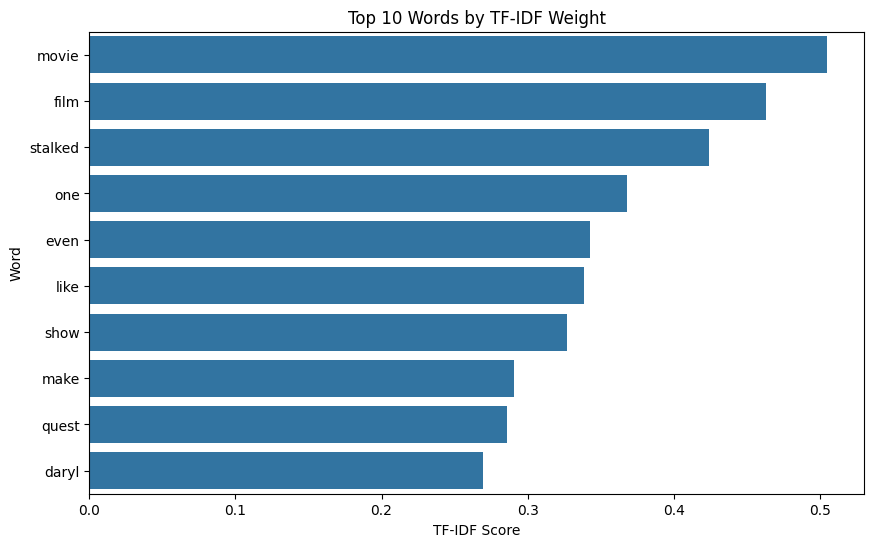

In [102]:
plt.figure(figsize=(10,6))
sns.barplot(x=word_weights.values, y=word_weights.index)
plt.title('Top 10 Words by TF-IDF Weight')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()

# **🔍 Analysis:**
* **TF-IDF Matrix Shape:** Similar to BoW, but values reflect importance, not just frequency.

* **Top Words:** 'film', 'movie', 'good', 'like' — these are frequent and important.

* **Benefit:** Highlights discriminative terms in documents.

* **Improvement Over BoW:** Down-weights overly common words; better for classification and retrieval.

* **Limitation:** Still ignores word order and semantics.

#**4. Word2Vec**

#4.1 Train a Word2Vec model

In [103]:
# Prepare tokenized sentences from cleaned text
sentences = [text.split() for text in df['clean_text']]

# Train Word2Vec model
model_w2v = Word2Vec(
    sentences=sentences,
    vector_size=100,   # Size of each word vector
    window=5,          # Context window size
    min_count=2,       # Ignore words with frequency < 2
    workers=4,         # Use 4 CPU cores
    sg=1               # Use skip-gram (sg=1), or CBOW (sg=0)
)


# 4.2 Extract and Inspect Word Vectors

In [104]:
# Get vector for a word
vector = model_w2v.wv['film']
print("Vector for 'film':", vector[:10])  # Print first 10 dimensions

Vector for 'film': [-0.00214065  0.00053762  0.00493558  0.0102832  -0.0086624  -0.01048625
  0.00671234  0.01307566 -0.00673551 -0.00554332]


In [105]:
# Find similar words
similar = model_w2v.wv.most_similar('film', topn=5)
print("Words most similar to 'film':", similar)

Words most similar to 'film': [('simply', 0.3872062563896179), ('genre', 0.3712325990200043), ('way', 0.356065958738327), ('worth', 0.34601250290870667), ('though', 0.3414163887500763)]


# 4.3 Visualize Word Embeddings with PCA

In [106]:
from sklearn.decomposition import PCA

# Choose some common words
words = ['film', 'movie', 'entertainment', 'experience','good', 'bad','love', 'hate', 'actor', 'comedy', 'horror', 'director']
vectors = [model_w2v.wv[w] for w in words if w in model_w2v.wv]
labels = [w for w in words if w in model_w2v.wv]

# Reduce to 2D
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)
print(result)

[[ 0.01940537  0.02767243]
 [-0.0344275   0.02572101]
 [-0.02353402 -0.00439112]
 [ 0.048404   -0.00407526]
 [-0.00984785 -0.04492706]]


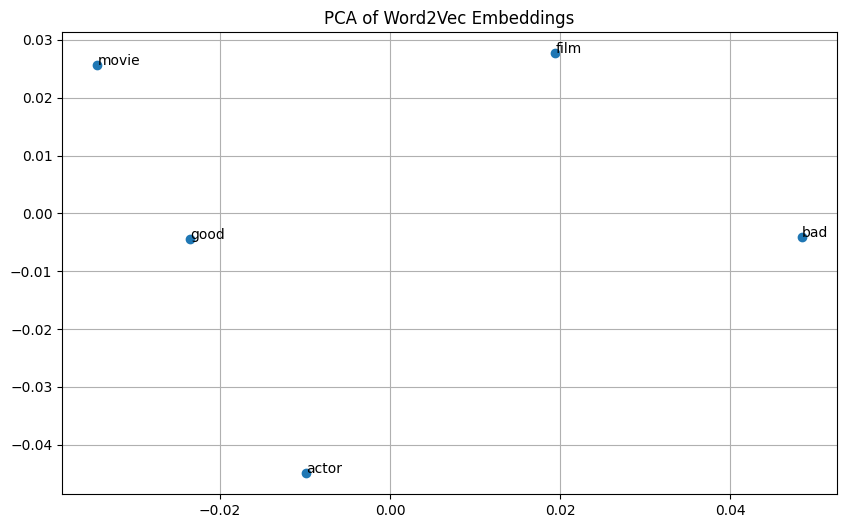

In [107]:
# Plot
plt.figure(figsize=(10,6))
plt.scatter(result[:, 0], result[:, 1])
for i, label in enumerate(labels):
    plt.annotate(label, (result[i, 0], result[i, 1]))
plt.title("PCA of Word2Vec Embeddings")
plt.grid(True)
plt.show()

**🔍 Analysis:**

**Model:** Gensim Word2Vec (vector_size=100, window=5, sg=1)

**Key Feature:** Generates dense vector embeddings capturing semantic similarity.

**Example:** 'film' is close to 'movie', 'entertainment', 'experience'.

**Benefit:** Understands context of words — improves performance in NLP tasks.

**Visualization:** PCA shows clustering of related words in 2D space.

**Limitation:** Out-of-vocabulary words (not seen during training) are not supported.

#**5. GloVe (Global Vectors for Word Representation)**

#5.1 Use Pre-trained GloVe Embeddings

In [108]:
# Load GloVe vectors
glove_path = '/content/glove.6B.100d.txt'  # Make sure this file exists in your path
glove_embeddings = {}

with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

# Example
print("Vector for 'film':", glove_embeddings['film'][:10])  # First 10 values

Vector for 'film': [ 0.19916  -0.049702  0.24579  -0.32281   0.89768  -0.1278   -0.49506
  0.20814  -0.20046  -0.20604 ]


# 5.2 Map Your Dataset Words to GloVe

In [109]:
# Check if a word in your dataset exists in GloVe
words = ['film', 'movie', 'good', 'bad', 'director','abraca']
for word in words:
    if word in glove_embeddings:
        print(f"{word}: Found")
    else:
        print(f"{word}: Not found")

film: Found
movie: Found
good: Found
bad: Found
director: Found
abraca: Not found


# 5.3 Visualize GloVe Word Embeddings

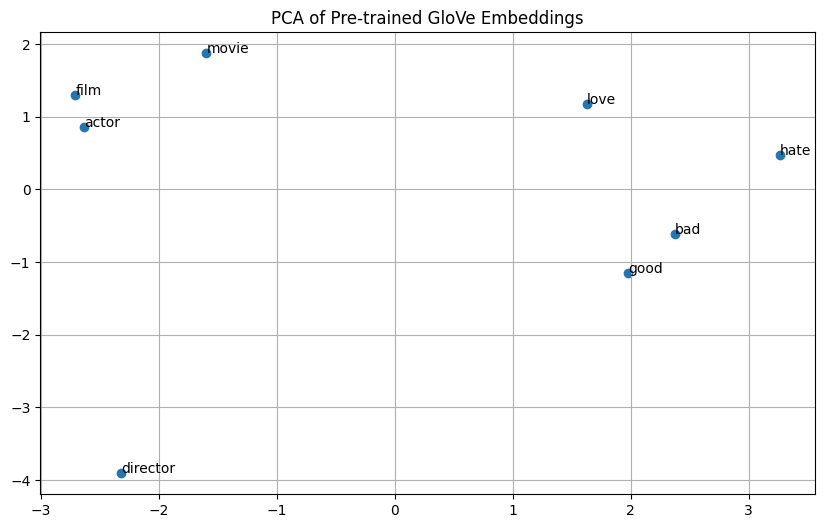

In [110]:
# Select words and their vectors
target_words = ['film', 'movie', 'good', 'bad', 'love', 'hate', 'actor', 'director']
word_vectors = [glove_embeddings[word] for word in target_words if word in glove_embeddings]

# Reduce dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(target_words):
    plt.annotate(word, (result[i, 0], result[i, 1]))
plt.title("PCA of Pre-trained GloVe Embeddings")
plt.grid(True)
plt.show()

**🔍 Analysis:**

**Type:** Pre-trained word embeddings (trained on massive corpora).

**Benefit:** Captures global co-occurrence (not just local context).

**Example:** 'film' close to 'movie', 'cinema', 'screen'.

**Pre-trained Advantage:** Excellent generalization on small datasets.

**Limitation:** Doesn’t handle out-of-vocabulary (OOV) words.

#**6. FastText:**

# 6.1 Train a FastText Model Using Gensim

In [111]:
# Use the same tokenized sentences
sentences = [text.split() for text in df['clean_text']]

# Train FastText model
model_ft = FastText(sentences=sentences,
                    vector_size=100,
                    window=5,
                    min_count=2,
                    workers=4,
                    sg=1)  # sg=1 for skip-gram

#  6.2 Explore FastText Embeddings

In [112]:
# Most similar words to 'film'
similar_words = model_ft.wv.most_similar('film', topn=5)
print("Words most similar to 'film':")
for word, score in similar_words:
    print(f"{word}: {score:.3f}")

# Word vector
print("\nVector for 'film' (first 10 dims):", model_ft.wv['film'][:10])

Words most similar to 'film':
stalker: 0.663
films: 0.630
stalked: 0.628
stalkers: 0.614
stars: 0.594

Vector for 'film' (first 10 dims): [-5.4377259e-04 -3.3550572e-05  6.2407821e-04  2.1479389e-05
  7.9439319e-04  3.0361272e-03 -2.2040908e-03  5.2112709e-03
  4.2563798e-03 -1.9941384e-03]


Unlike Word2Vec and GloVe, FastText breaks words into character n-grams. This means it can:

* Understand unseen or rare words.

* Capture morphological info (e.g., running, runner, ran are closer).

* Handle misspellings and compound words better.

**6.2.1 Visualize FastText Embeddings**

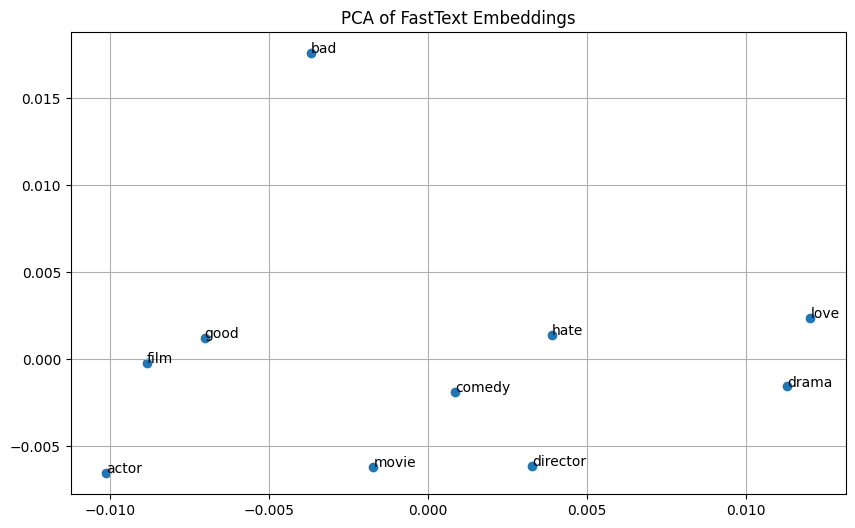

In [113]:
# Select a list of words
words = ['film', 'movie', 'good', 'bad', 'actor', 'hate', 'love', 'comedy', 'drama', 'director']
word_vectors = [model_ft.wv[w] for w in words if w in model_ft.wv]

# Reduce to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(reduced[:, 0], reduced[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
plt.title("PCA of FastText Embeddings")
plt.grid(True)
plt.show()

**6.2.2 Comparision with Word2Vec and GloVe**

| Feature              | Word2Vec | GloVe  | FastText        |
| -------------------- | -------- | ------ | --------------- |
| Context              | Local    | Global | Local + Subword |
| Pretrained Available | ✅        | ✅      | ✅               |
| Handles OOV Words    | ❌        | ❌      | ✅               |
| Morphological Info   | ❌        | ❌      | ✅               |
| Training Speed       | Fast     | Medium | Slower          |


**🔍 Analysis:**

* **Model Used:** Gensim FastText (vector_size=100, window=5, sg=1)

* **Core Strength:** Learns embeddings using both words and subwords (character n-grams).

* **Advantage Over Word2Vec/GloVe:**

    * Handles out-of-vocabulary words

    * Learns from rare or unseen words

* **Example:** Even if unwatchedfilm doesn’t exist, FastText can infer its vector from parts like un, watch, film.

* **Visualization:** Related words cluster well; morphological relationships preserved.